Training set values data and labels: from here:
https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/


Note: you must create an account to download the data

## Load the data and necessary libraries

In [1]:
file_train = "~/ds/projects/mod_3_project/tanzania-water-wells/data/raw/training-set-values.csv" #x_train, training set values data
file_target_train = "~/ds/projects/mod_3_project/tanzania-water-wells/data/raw/training-labels.csv" #y_train, training set labels
file_test = "~/ds/projects/mod_3_project/tanzania-water-wells/data/raw/test-set.csv" #x_test, test set data

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder 

## EDA
Read the files, view samples of the data, and look at the columns

In [3]:
df_train = pd.read_csv(file_train)
df_train.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [5]:
df_train.shape

(59400, 40)

In [6]:
df_train['id'].count()

59400

In [7]:
df_target_train = pd.read_csv(file_target_train)
df_target_train.head(5)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
df_test = pd.read_csv(file_test)
df_test.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [9]:
df_train.shape

(59400, 40)

In [10]:
df_test.columns #should be the same as df_train

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

# More EDA
Do we have null and 0 values?

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [12]:
list_a = ['gps_height', 'longitude', 'latitude', 'num_private', 
        'region_code', 'district_code', 'population', 'construction_year']

print('zero values for ints and floats')
for i in list_a:
    print(i, len(df_train[df_train[i] == 0]))

    
list_b = ['date_recorded', 'funder',
       'installer', 'wpt_name',
       'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group']    
print('\n\nempty values for objects')
for i in list_b:
    print(i, len(df_train[df_train[i].isnull()]))

zero values for ints and floats
gps_height 20438
longitude 1812
latitude 0
num_private 58643
region_code 0
district_code 23
population 21381
construction_year 20709


empty values for objects
date_recorded 0
funder 3635
installer 3655
wpt_name 0
basin 0
subvillage 371
region 0
lga 0
ward 0
public_meeting 3334
recorded_by 0
scheme_management 3877
scheme_name 28166
permit 3056
extraction_type 0
extraction_type_group 0
extraction_type_class 0
management 0
management_group 0
payment 0
payment_type 0
water_quality 0
quality_group 0
quantity 0
quantity_group 0
source 0
source_type 0
source_class 0
waterpoint_type 0
waterpoint_type_group 0


## Even more EDA...
Viewing bins

In [18]:
df_train['num_private'].value_counts().head()

0    58643
6       81
1       73
5       46
8       46
Name: num_private, dtype: int64

In [21]:
df_train['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [22]:
df_train['ward'].value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
Kitunda             203
Mishamo             203
Msindo              201
Chalinze            196
Maji ya Chai        190
Usuka               187
Ngarenanyuki        172
Chanika             171
Vikindu             162
Mtwango             153
Matola              145
Zinga/Ikerege       141
Wanging'ombe        139
Maramba             139
Itete               137
Magomeni            135
Kikatiti            134
Ifakara             134
Olkokola            133
Maposeni            130
Mvomero             129
Igongolo            129
Mlangali            125
Nkoma               122
Mahongole           121
                   ... 
Igogo                 1
Kinungu               1
Simbay                1
Mkumbi                1
Kitete                1
Kihangimahuka         1
Mawenzi               1
Ukata                 1
Korongoni             1
Mitole                1
Machinjioni     

In [23]:
df_train['lga'].value_counts()

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Kigoma Rural         824
Magu                 824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Namtumbo             694
Lushoto              694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
                    ... 
Newala               231
Bahi                 224
Kisarawe             223
Temeke               215
Rorya                210
Tarime               209
Ngorongoro           201
Kiteto               193
Shinyanga Urban      191


In [24]:
df_train['subvillage'].value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
Sokoni            232
M                 187
Muungano          172
Mbuyuni           164
Mlimani           152
Songambele        147
Miembeni          134
Msikitini         134
1                 132
Kibaoni           114
Kanisani          111
I                 109
Mapinduzi         109
Mjimwema          108
Mjini             108
Mkwajuni          104
Mwenge            102
Azimio             98
Mabatini           98
Mission            95
Mbugani            95
Bwawani            91
Bondeni            90
Chang'Ombe         88
Zahanati           86
                 ... 
Chumbu              1
Unyamlani           1
Magobeka            1
Ubanyumela          1
Nyamatemele         1
Mgoto               1
Ntabo               1
Chang'Ombe B        1
Msing'Ole           1
Igunguhi            1
Zimbili Msikit      1
Tulawandu           1
Zebwe               1
Kwamoshi            1
Matani    

In [25]:
df_train['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [27]:
df_train['wpt_name'].value_counts()

none                    3563
Shuleni                 1748
Zahanati                 830
Msikitini                535
Kanisani                 323
Bombani                  271
Sokoni                   260
Ofisini                  254
School                   208
Shule Ya Msingi          199
Shule                    152
Sekondari                146
Muungano                 133
Mkombozi                 111
Madukani                 104
Mbugani                   94
Hospital                  94
Upendo                    93
Kituo Cha Afya            90
Mkuyuni                   88
Umoja                     84
Center                    83
Ccm                       81
Kisimani                  78
Mtakuja                   76
Ofisi Ya Kijiji           76
Tankini                   73
Bwawani                   66
Songambele                66
Maendeleo                 64
                        ... 
Kwa Zebedayo Masawe        1
Marwa Chacha Waisare       1
Kwa Misayo                 1
Kwa Fulugence 

## Dummy model - numerical values

In [19]:
X_train = df_train[list_a]
y_train = df_target_train['status_group']

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5) 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

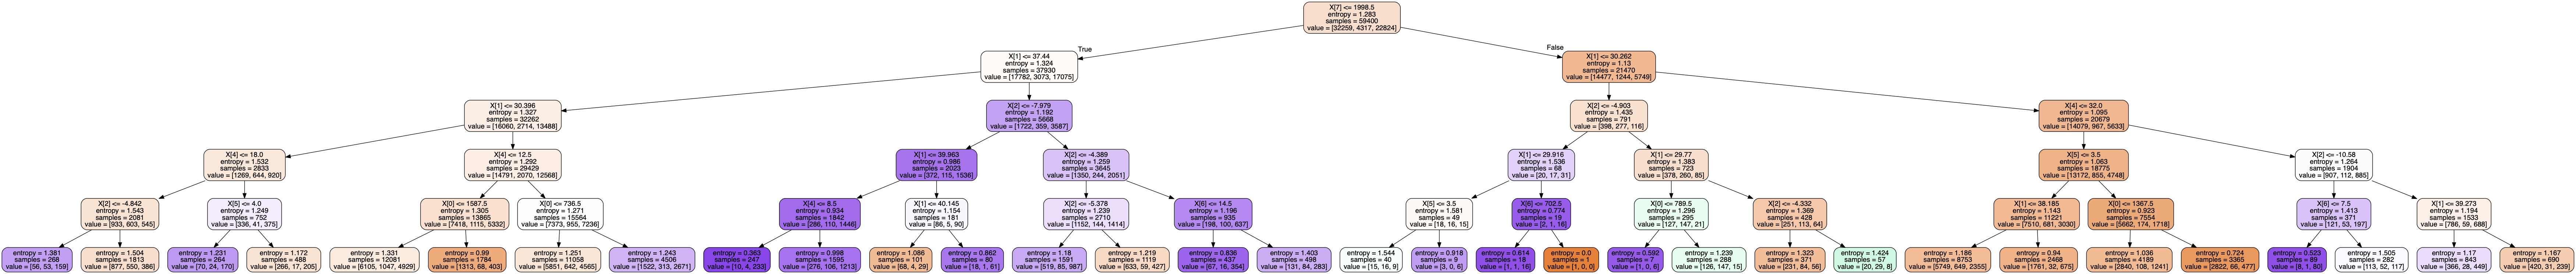

In [20]:
dot_file = StringIO()

export_graphviz(dtc, out_file=dot_file, filled=True,
               rounded=True)

image=pydotplus.graph_from_dot_data(dot_file.getvalue())
Image(image.create_png())

In [21]:
df_test.shape

(14850, 40)

In [22]:
predicts = dtc.predict(df_test[list_a])

In [23]:
predicts_df = pd.DataFrame(predicts)

In [24]:
predicts_id = df_test['id']
predicts_id = pd.DataFrame(predicts_id)

In [25]:
predicts = predicts_id.join(predicts_df)
predicts = predicts.rename(columns={0:'status_group'})

In [26]:
predicts.shape

(14850, 2)

In [28]:
predicts.to_csv('base_model_decision_tree.csv', index=None)

# One Hot Encode the categorical variables

In [28]:

# -- excluded 
# 'payment_type' -- same (but different bin titles)
# 'quantity_group' -- literally the same
# -- excluded the general groups (binned versions of another column), kept the more granular groups in this model
# 'source_class' 
# 'management_group'
# 'waterpoint_type_group'
# 'extraction_type_group', 'extraction_type_class',
# 'quality_group'
# -- funder vs installer
# 'installer',

# --- removed for NAN OHE issue
#'public_meeting',
# 'permit'

#--  
# 'basin'
# 'region'

#'funder', 

list_c = ['basin', 'region',
       'scheme_management', 'scheme_name',
       'extraction_type',
       'management', 'payment', 
       'water_quality', 'quantity',
       'source', 'source_type', 'waterpoint_type']
wells = df_train[list_c]



In [29]:
onehotencoder = OneHotEncoder() 

In [30]:
wells = wells.replace(np.nan, 'unknown')
wells = wells.replace('', 'unknown')


In [58]:
len(wells[wells.isna().any(axis=1)])

0

In [31]:
test_data = onehotencoder.fit_transform(wells).toarray()

In [32]:
test_data.shape


(59400, 2814)

In [33]:
X_train = test_data
y_train = df_target_train['status_group']

dtc = DecisionTreeClassifier(random_state=42, max_depth=5) 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

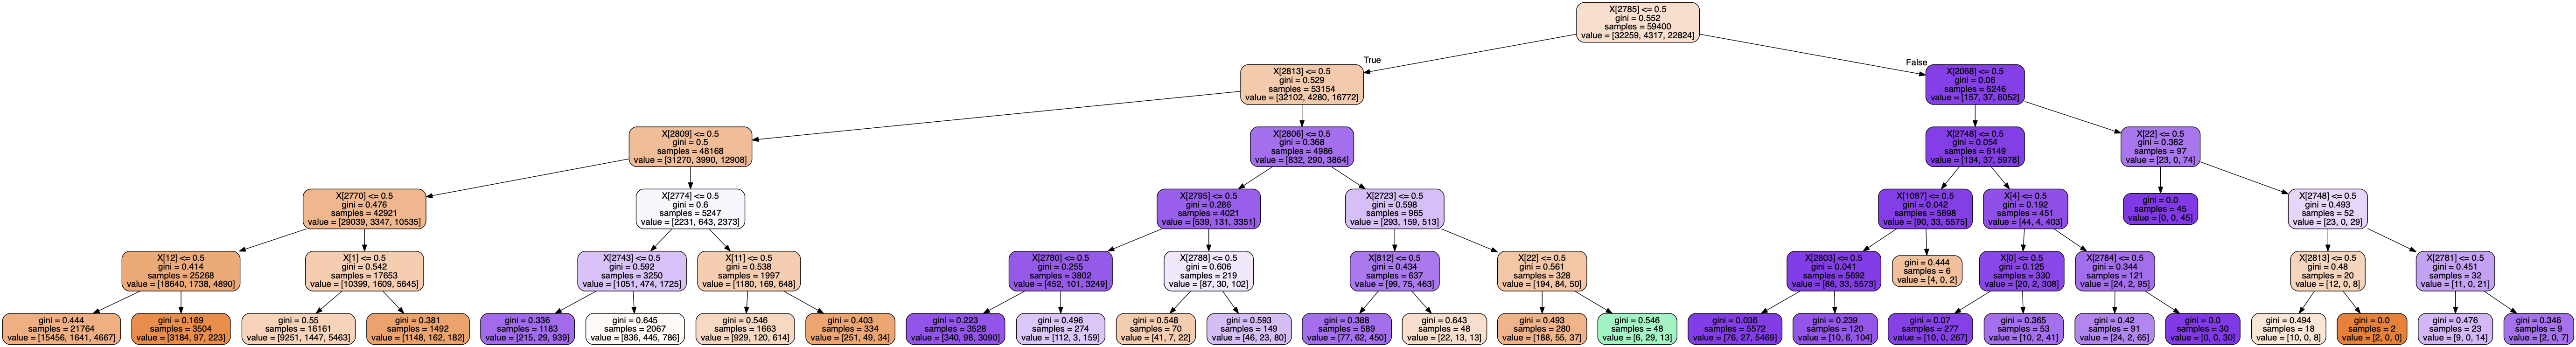

In [34]:
dot_file = StringIO()

export_graphviz(dtc, out_file=dot_file, filled=True,
               rounded=True)

image=pydotplus.graph_from_dot_data(dot_file.getvalue())
Image(image.create_png())

## Join the Numerical and Categorical data, run a model

In [44]:
test_data_df = pd.DataFrame(test_data)

combined_df = df_train[list_a].join(test_data_df)

In [45]:
combined_df.shape

(59400, 2822)

In [46]:
dtc2 = DecisionTreeClassifier(random_state=42, max_depth=5) 
dtc2.fit(combined_df, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

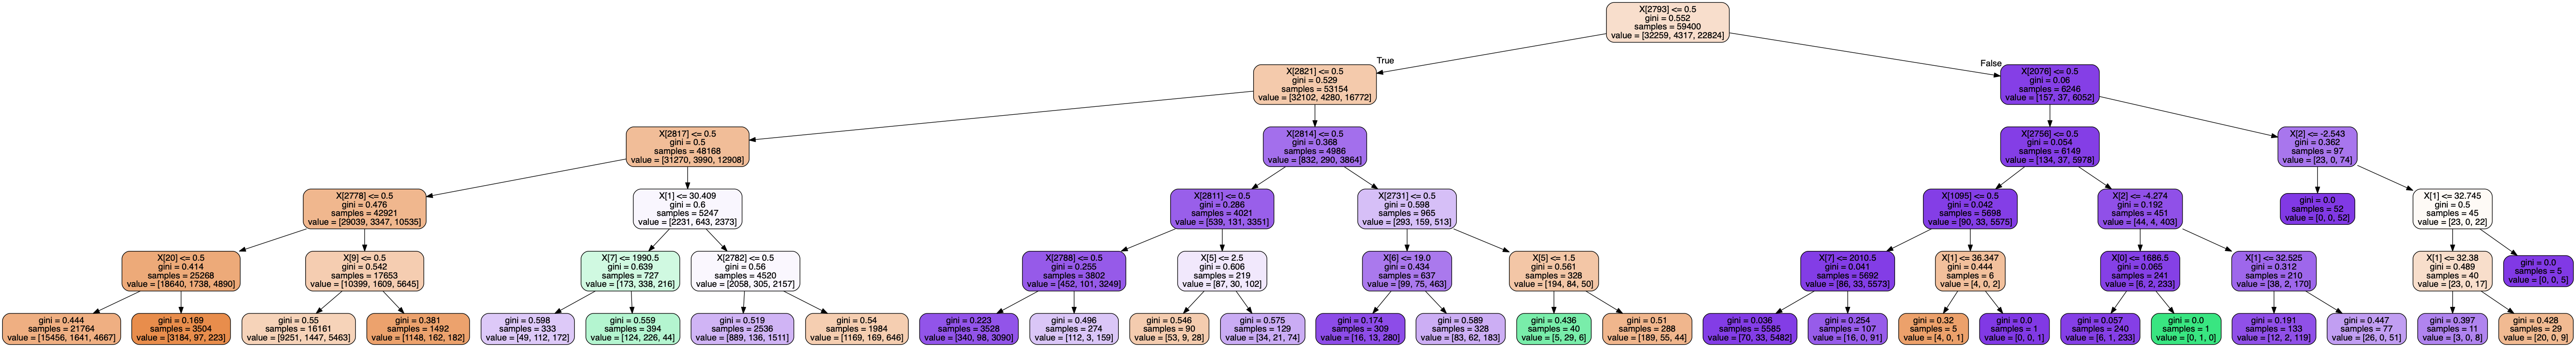

In [48]:
dot_file = StringIO()

export_graphviz(dtc2, out_file=dot_file, filled=True,
               rounded=True)

image=pydotplus.graph_from_dot_data(dot_file.getvalue())
Image(image.create_png())

In [49]:
n_nodes = dtc2.tree_.node_count
children_left = dtc2.tree_.children_left
children_right = dtc2.tree_.children_right
feature = dtc2.tree_.feature
threshold = dtc2.tree_.threshold

# This code courtesy of sklearn:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 55 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 2793] <= 0.5 else to node 32.
	node=1 test node: go to node 2 if X[:, 2821] <= 0.5 else to node 17.
		node=2 test node: go to node 3 if X[:, 2817] <= 0.5 else to node 10.
			node=3 test node: go to node 4 if X[:, 2778] <= 0.5 else to node 7.
				node=4 test node: go to node 5 if X[:, 20] <= 0.5 else to node 6.
					node=5 leaf node.
					node=6 leaf node.
				node=7 test node: go to node 8 if X[:, 9] <= 0.5 else to node 9.
					node=8 leaf node.
					node=9 leaf node.
			node=10 test node: go to node 11 if X[:, 1] <= 30.408580780029297 else to node 14.
				node=11 test node: go to node 12 if X[:, 7] <= 1990.5 else to node 13.
					node=12 leaf node.
					node=13 leaf node.
				node=14 test node: go to node 15 if X[:, 2782] <= 0.5 else to node 16.
					node=15 leaf node.
					node=16 leaf node.
		node=17 test node: go to node 18 if X[:, 2814] <= 0.5 else to node 25.
			nod

In [52]:
np.join(list_a, list_b, axis=1)

AttributeError: module 'numpy' has no attribute 'join'

## More EDA...



In [96]:

def obj_preprocessing(df, obj_list):
    df_current = df[obj_list]
    
    # Clean the df if there are NaNs
    df = NaN_cleaning(df_current)
    
    #OHE data
    array_current, col_names = ohe_data(df)
    
    #return a dataframe of the OHE data
    df = pd.DataFrame(array_current, columns=col_names)
    return df
    
    
    
def ohe_data(df):
    #OHE the data
    onehotencoder = OneHotEncoder() # Instantiate a One Hot Encoder object 
    print('One hot encoding data')
    array_current = onehotencoder.fit_transform(df).toarray()
    col_names = onehotencoder.categories_
    return array_current, col_names

        
        
def NaN_cleaning(df):
    # Replace NaN with "unknown" bin
    print('Cleaning the data')
    df = df.replace(np.nan, 'unknown')
    print(f'Check: Number of rows with nulls: {len(df[df.isna().any(axis=1)])}')
    return df

In [97]:
obj_preprocessing(wells, list_c)


Cleaning the data
Check: Number of rows with nulls: 0
One hot encoding data


ValueError: all arrays must be same length